In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the display options
pd.set_option('display.float_format', '{:.2f}'.format)

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')
from prepare_utils import split_data
import explore_utils

import wrangle

from tqdm.notebook import trange, tqdm
from tqdm import tqdm

In [167]:
for col in tqdm(df.columns):
    3+3

100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1334.92it/s]


1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.


In [2]:
train, validate, test = split_data(df=wrangle.wrangle_zillow_data(), 
                                   test_size=0.15,
                                   validate_size=0.15,
                                   random_state=125)

In [3]:
train.head()

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
1728610,2,2.0,936,91765,1985,1100.13,LA
882345,4,2.0,1680,101431,1958,1405.06,LA
2005705,4,2.0,1876,76885,1965,1387.54,Orange
454112,2,2.0,1262,264928,1924,3193.82,LA
411712,3,3.0,1890,293699,1982,4161.07,LA


3. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

 25%|███████████                                 | 9/36 [02:16<06:31, 14.48s/it]
KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7fb0e43a6f80> (for post_execute):



KeyboardInterrupt



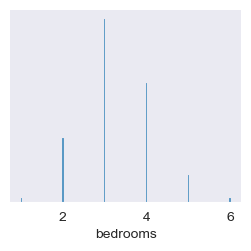

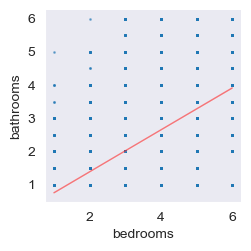

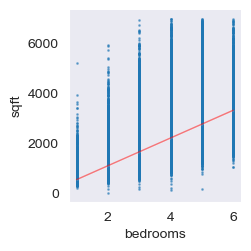

Error in callback <function flush_figures at 0x7fb0aef6f7f0> (for post_execute):



KeyboardInterrupt



In [170]:
# Sample the data and assign it to a new DataFrame
sampled_data = train.sample(frac=0.2, random_state=125)

# Get the column names for the pairplot
column_names = sampled_data.select_dtypes(include='number').columns.tolist()

# Initialize tqdm to track the progress
pbar = tqdm(total=len(column_names) * len(column_names))

# Loop through the pairs of variables and create the pairplot
for i in column_names:
    for j in column_names:
        sns.pairplot(data=sampled_data, x_vars=i, y_vars=j, kind='reg', corner=True,
                     plot_kws={'scatter_kws': {'s': 1, 'alpha': 0.5},
                                'line_kws': {'linewidth': 1, 'alpha': 0.5, 'color': 'red'}})
        pbar.update(1)

# Close the progress bar
pbar.close()

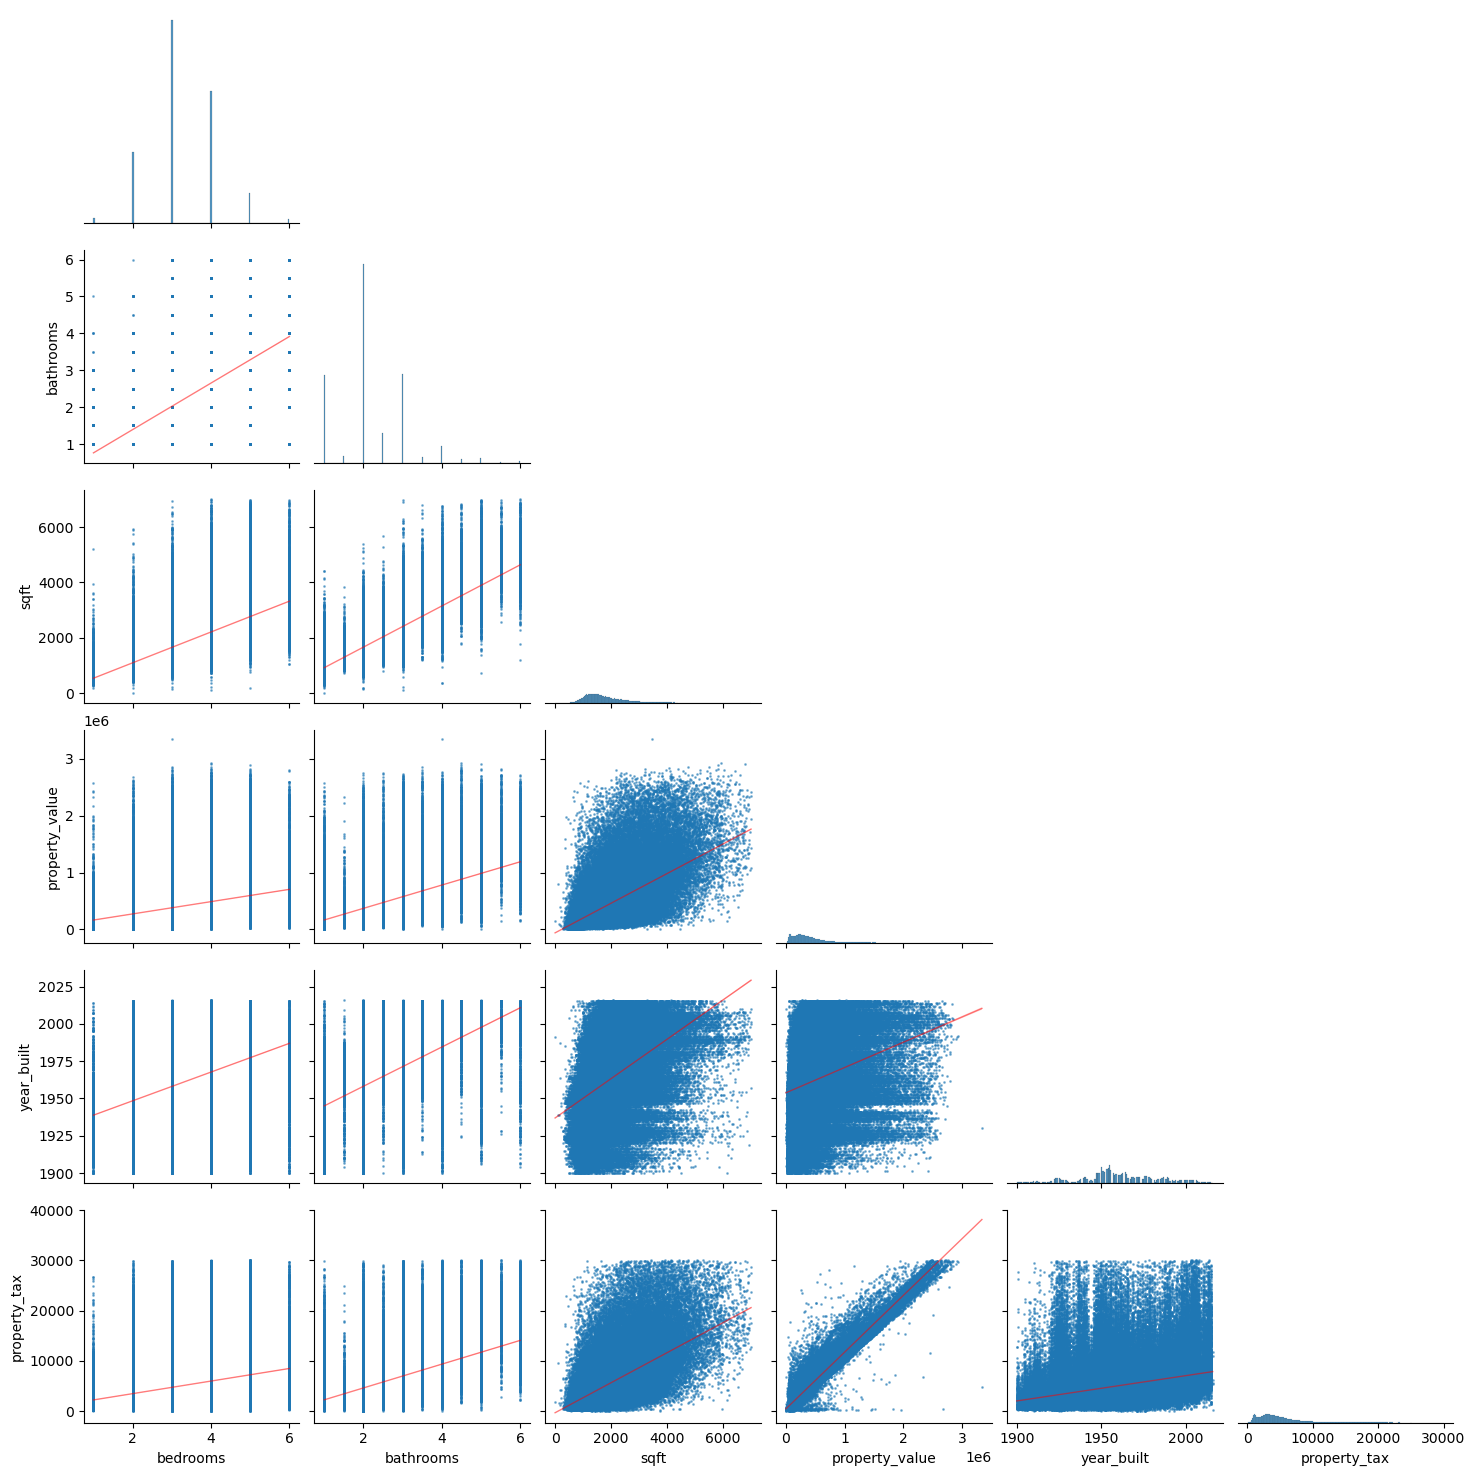

In [28]:
sns.pairplot(data=train.sample(frac=.2, random_state=125), kind='reg', corner=True,
             plot_kws={'scatter_kws':{'s':1, 'alpha':.5},
                       'line_kws':{'linewidth':1, 'alpha':.5, 'color':'red'}})

In [204]:
np.triu(np.ones_like(train.corr().iloc[1:,:-1]), k=1)

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_14884/1382228980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.triu(np.ones_like(train.corr().iloc[1:,:-1]), k=1)


array([[0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_12425/2950996863.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_12425/2950996863.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


<Axes: >

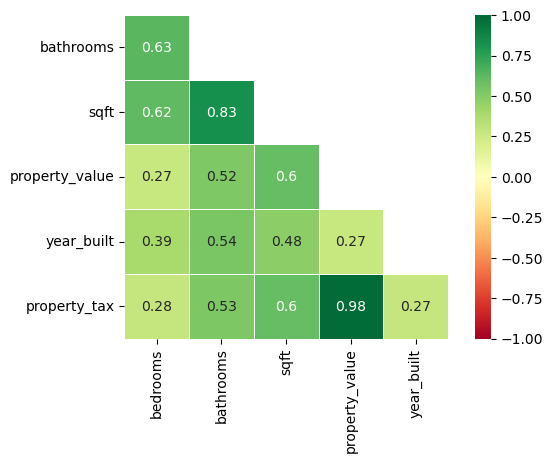

In [26]:
plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                     cmap='RdYlGn', vmin=-1, vmax=1, square=True)

In [214]:
train.corr()['property_value']

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_14884/2338381131.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['property_value']


bedrooms         0.27
bathrooms        0.52
sqft             0.60
property_value   1.00
year_built       0.27
property_tax     0.98
Name: property_value, dtype: float64

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_14884/4201604472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()['property_value'].to_frame())


<Axes: >

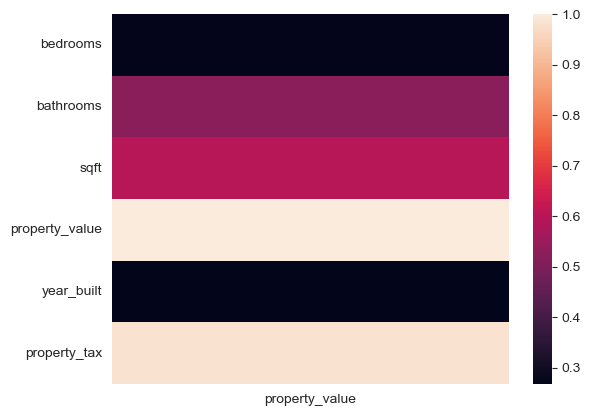

In [215]:
sns.heatmap(train.corr()['property_value'].to_frame())

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_14884/1562284739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()['property_value'].sort_values().to_frame(), linewidths=.5, annot=True,


<Axes: >

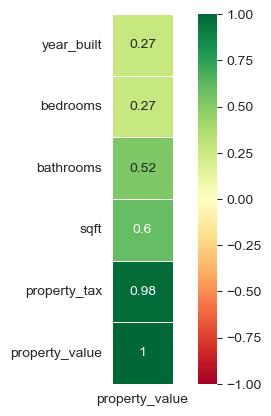

In [217]:
sns.heatmap(train.corr()['property_value'].sort_values().to_frame(), linewidths=.5, annot=True,
                     cmap='RdYlGn', vmin=-1, vmax=1, square=True)

In [4]:
def plot_variable_pairs(df):
    
    plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

    mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
    sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                         cmap='RdYlGn', vmin=-1, vmax=1, square=True)
    plt.show()
    
    
    sns.pairplot(data=train, kind='reg', corner=True,
             plot_kws={'scatter_kws':{'s':1, 'alpha':.5},
                       'line_kws':{'linewidth':1, 'alpha':.5, 'color':'red'}})
    plt.show()

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_14884/822601392.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_14884/822601392.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


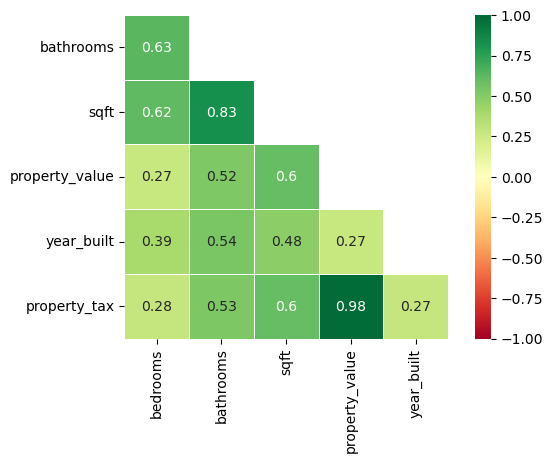

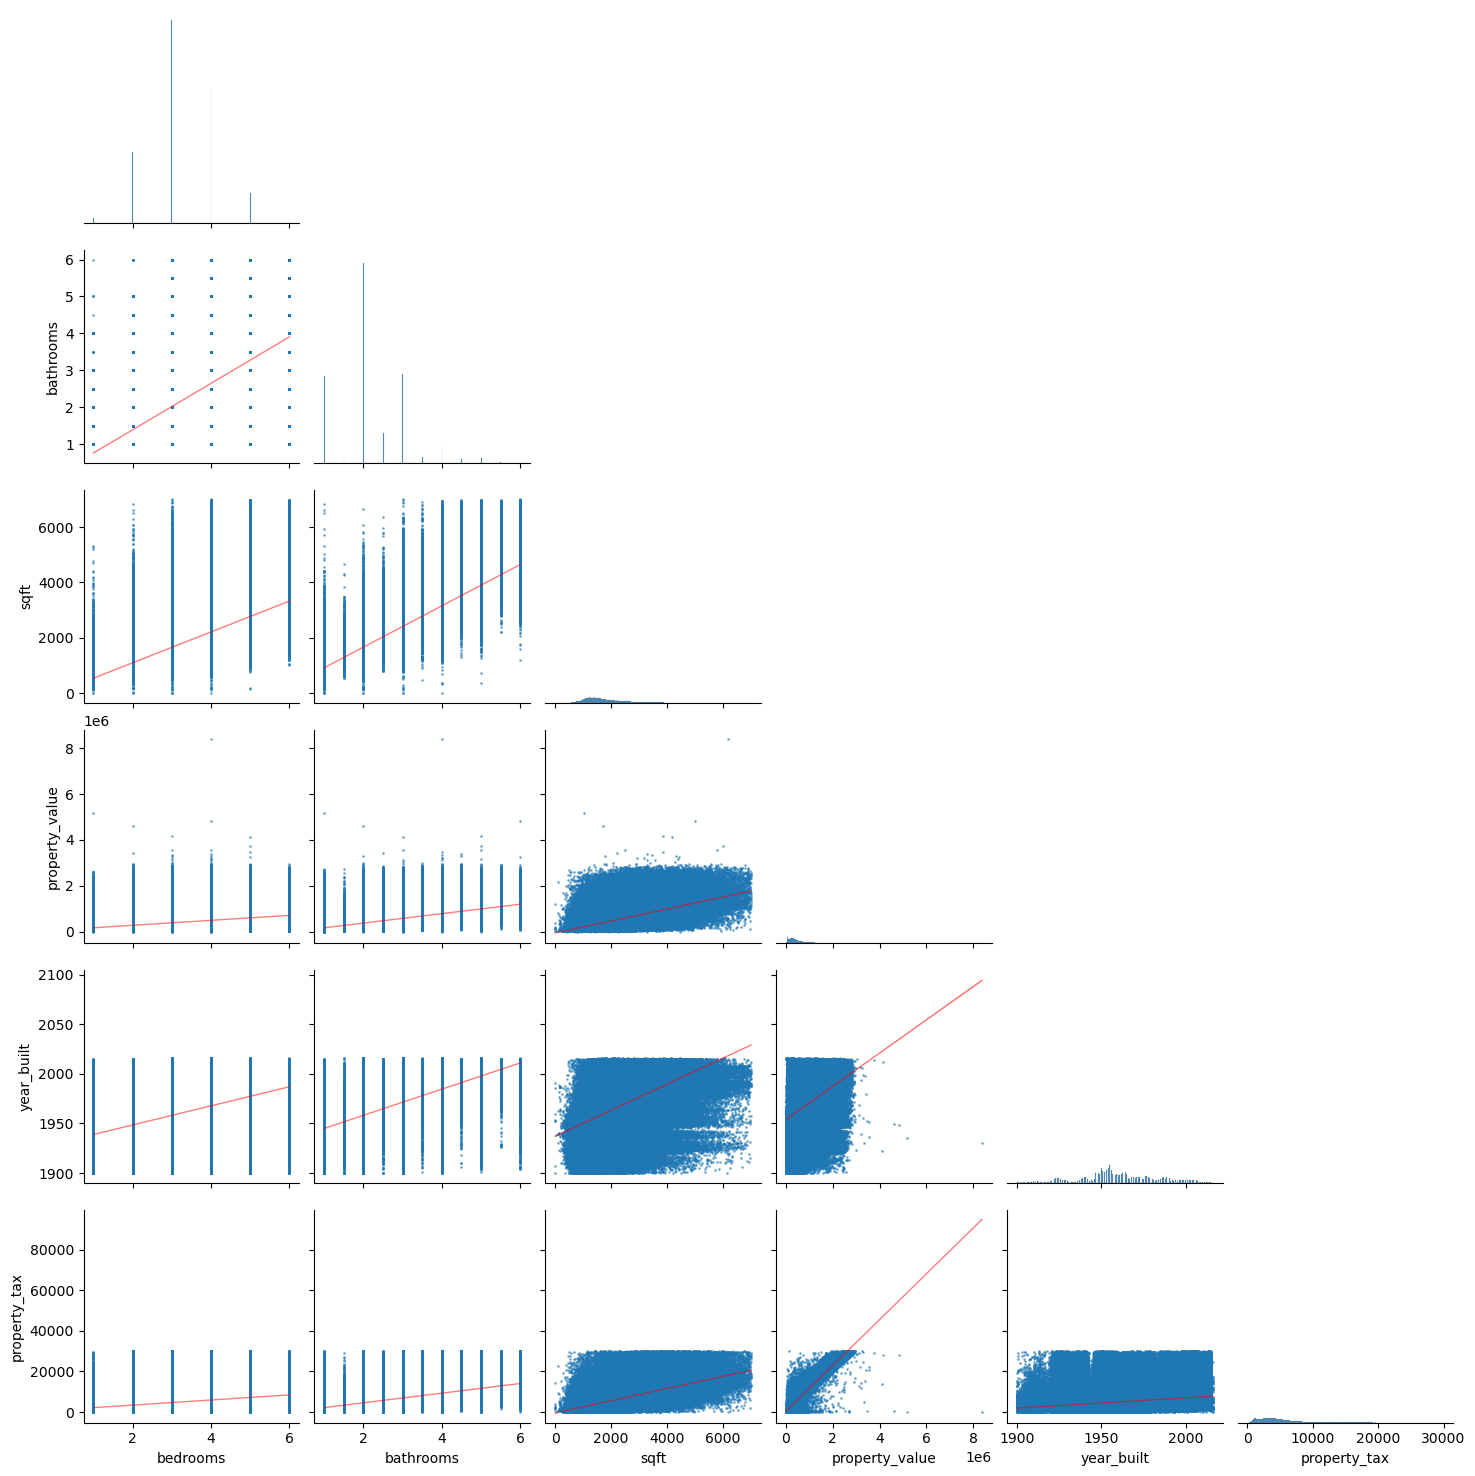

In [5]:
plot_variable_pairs(train)

4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [12]:
df=train
col='county'
target='property_value'

In [13]:
display(df.groupby(col)[target].describe().T)

county,LA,Orange,Ventura
count,975431.00,376742.00,111314.00
mean,382845.85,482980.61,426113.66
std,341167.72,370011.59,296660.31
min,22.00,2080.00,4544.00
25%,170000.00,243850.00,236852.00
50%,292115.00,401737.00,371656.50
75%,475373.00,621531.00,543298.75
max,8375162.00,3411240.00,2789632.00


<Axes: xlabel='county', ylabel='property_value'>

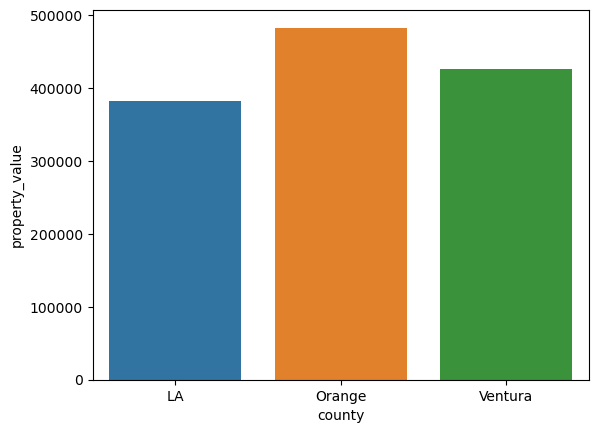

In [15]:
sns.boxplot(data=train)

<Axes: xlabel='county', ylabel='property_value'>

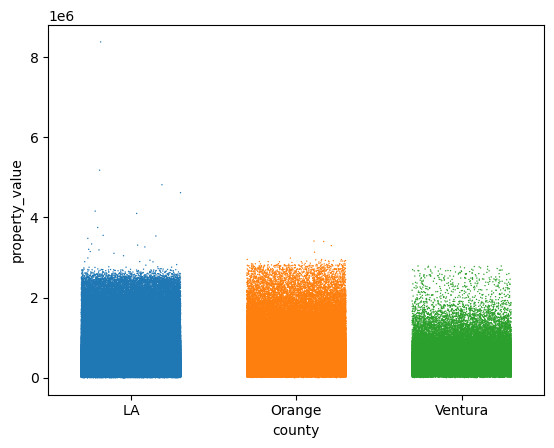

In [23]:
sns.stripplot(data=df, x=col, y=target, hue=col, jitter=.3,
              size=1, legend=False)

In [38]:
1e6

1000000.0

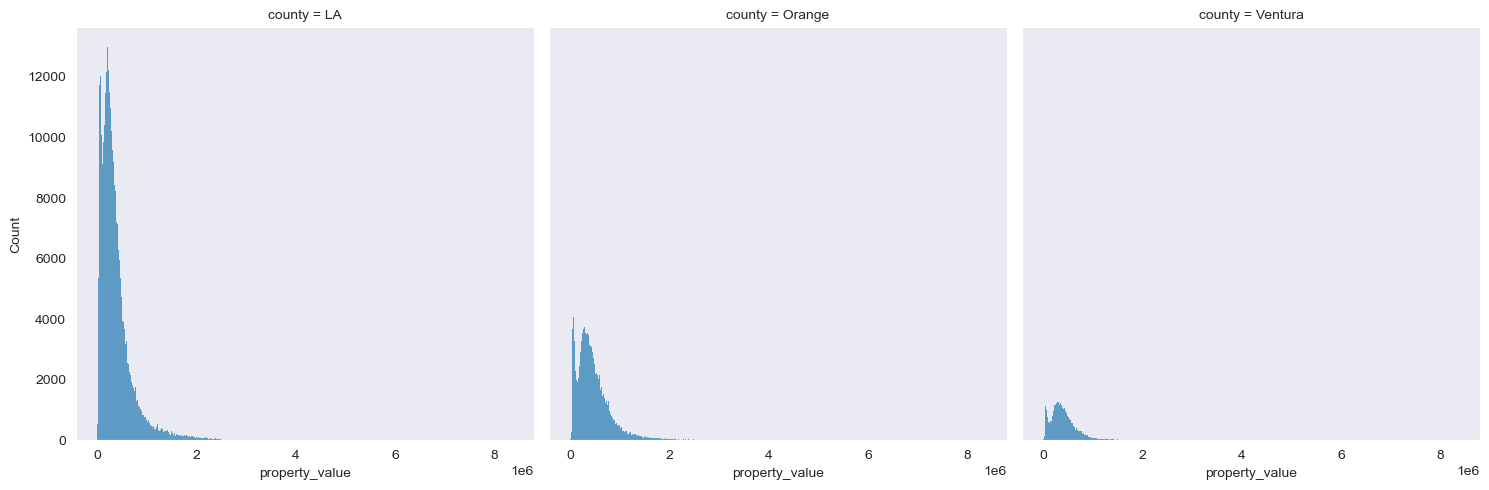

In [198]:
sns.displot(col='county', x=target, data=df)

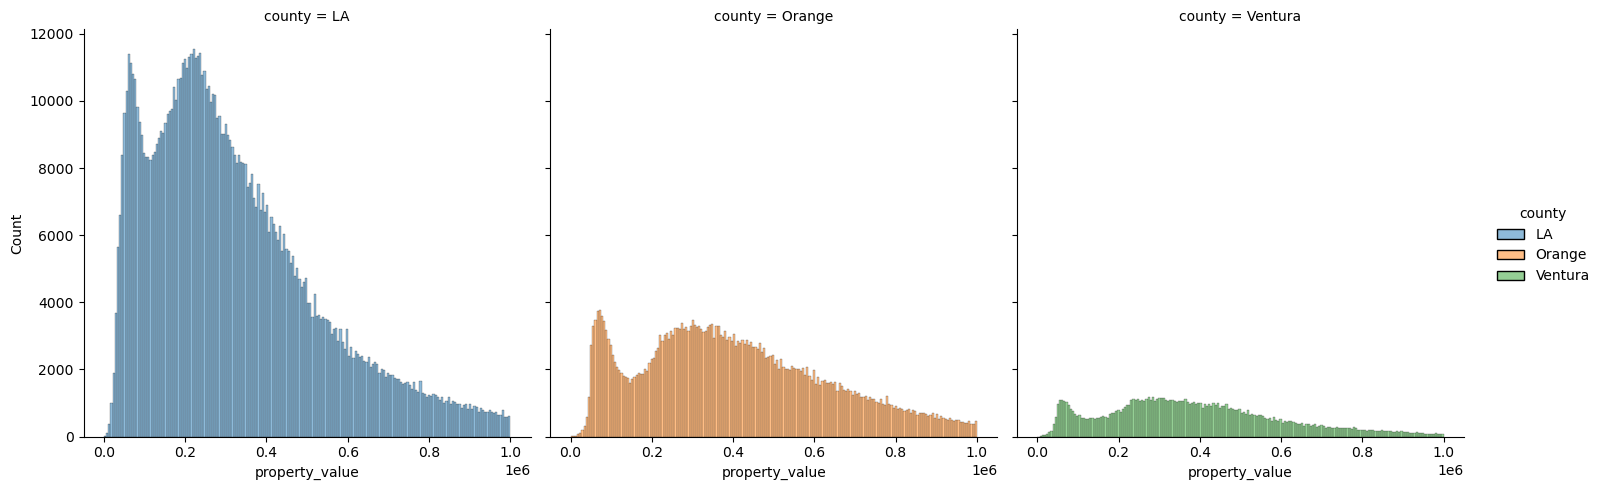

In [39]:
sns.displot(col=col, x=target, data=df[df['property_value']<1e6], hue=col)

<Axes: xlabel='bedrooms', ylabel='property_value'>

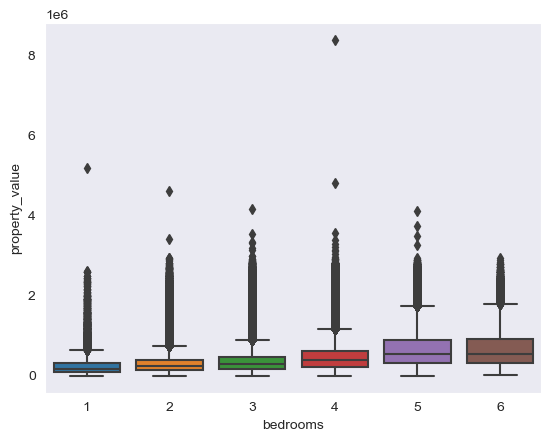

In [165]:
sns.boxplot(x=col, y=target, data=df)

<Axes: xlabel='bedrooms', ylabel='property_value'>

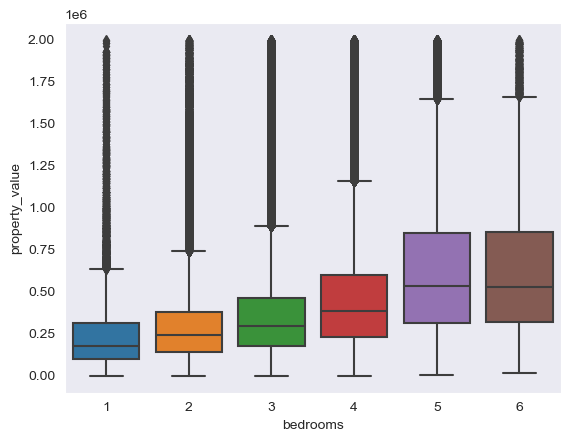

In [47]:
sns.boxplot(x='bedrooms', y=target, data=df[df['property_value']<2e6])

In [151]:
target

'property_value'

In [163]:
sns.color_palette()[:6]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

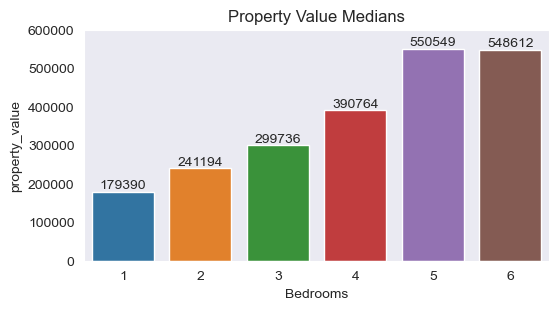

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:

<Figure size 600x300 with 0 Axes>

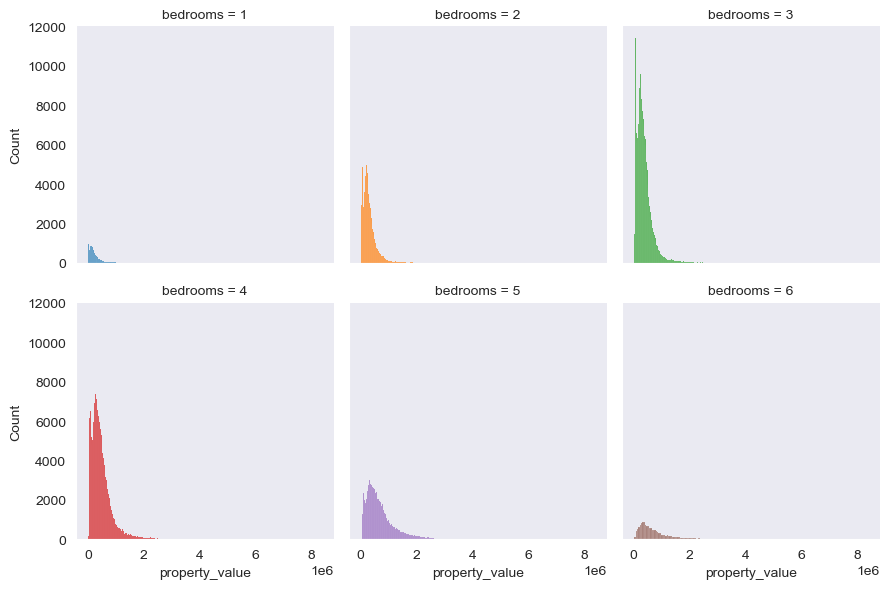

In [197]:
col = 'bedrooms'
sns.set_style('dark')

plt.figure(figsize=(6,3))
sns.barplot(x=col, y=target, data=df, errorbar=None, estimator='median')

ax = plt.gca()
# Annotate the bars
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
ax.set_title(f'''{' '.join([word.capitalize() for word in target.split('_')])} Medians''')
ax.set_xlabel(col.capitalize())
# axes[0,0].set_ylabel(' '.join([word.capitalize() for word in target.split('_')]))
ax.set_yticks(range(0,
                 int(max(df.groupby(col)[target].median())) +\
                 10 ** math.floor(math.log10(max(df.groupby(col)[target].median()))), 
                 10 ** math.floor(math.log10(max(df.groupby(col)[target].median())))))
plt.show()

# fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# sns.boxplot(x=col, y=target, data=df, ax=axes[0])

# sns.stripplot(data=df, x=col, y=target, jitter=.3, hue=col,
#               size=.25, legend=False, ax=axes[1], palette=sns.color_palette()[:6])

# plt.show()

plt.figure(figsize=(6,3))

cols = len(df[col].unique())//2

# Create the FacetGrid
g = sns.FacetGrid(data=df, col=col, col_wrap=cols, hue=col)

# Map displot to each subplot in the grid
g.map(sns.histplot, target, legend=False, palette=sns.color_palette()[:6])

# Adjust the layout to show the plots
plt.tight_layout()
plt.show()

# for ax in axes:
#     for a in ax:
#         a.set_ylabel(' '.join([word.capitalize() for word in target.split('_')]))
#         a.set_xlabel(' '.join([word.capitalize() for word in col.split('_')]))

In [ ]:
def explore_bivariate_cat_to_cont_target(df, target, cont_cols=None):
    '''
    Explores continuous feature relationships to categorical target
    Provides descriptive stats for each target category
    Shows continuous feature correlations for two-category target
    Plots bar chart of feature averages for each target category
    '''

    # set default categorical columns
    if cont_cols == None:
        cont_cols = get_cat_and_cont_cols(df)[1]
        
    # display descriptive stats for each target category
    display(df.groupby(col)[target].describe().T)
    
#     # display, in order, pearson R correlations to the target if target is binary
#     if len(df[target].unique()) == 2:
#         print(f'Continuous feature correlations (Pearson R) to {target}:')
#         display(df[cont_cols+[target]].corr()[target]\
#                                       .sort_values(ascending=False))

    for col in cat_cols:
        plot_bivariate_cat_to_cont_target_charts(df, target, col)
        
def plot_bivariate_cat_to_cont_target_charts(df, target, col):
    sns.set_style('dark')
    fig, axes = plt.subplots(2, 2, figsize=(7.5, 7.5))
    plt.subplots_adjust(hspace=.3, wspace=0.4)
    
    col_label = ' '.join([word.capitalize() for word in col.split('_')])

    # first plot
    sns.barplot(x=target, y=col, data=df, errorbar=None, ax=axes[0,0])
    # Annotate the bars
    for p in axes[0,0].patches:
        axes[0,0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                            ha='center', va='bottom')
    axes[0,0].set_title(f'''{col_label} Averages''')
    axes[0,0].set_xlabel(target.capitalize())
    axes[0,0].set_xticks([0, 1], ['No', 'Yes'])
    axes[0,0].set_ylabel(col_label)
#     axes[0,0].set_yticks(range(0,
#                                int(max(df[df[target]==1][col].mean(), df[df[target]==0][col].mean()))+25,
#                                5))
#     # add line indicating total tenure average
#     axes[0,0].axhline(df[col].mean(), label=f'Total {col_label} mean', color='red')
#     axes[0,0].annotate(f'''{df[col].mean():.2f}''', xy=(.5, df[col].mean()),
#                         ha='center', va='bottom')
    # Display the legend
#     axes[0,0].legend(loc='upper right', edgecolor='black')

    # second plot
    sns.stripplot(data=df, x=target, y=col, hue=target, jitter=.3,
                  size=1.5, ax=axes[0,1], legend=False)
    axes[0,1].set_title(f'''{col_label} by {target.capitalize()}''')
    axes[0,1].set_xlabel(target.capitalize())
    axes[0,1].set_xticks([0, 1], ['No', 'Yes'])
    axes[0,1].set_ylabel(col_label)

    plt.xticks()


    # third plot
    sns.histplot(hue=target, x=col, data=df[df[target]==0], ax=axes[1,0], legend=False)
    axes[1,0].set_title(f'''{col_label} Distribution of Non-{target.capitalize()}''')
    axes[1,0].set_xlabel(target.capitalize())

    # fourth plot
    sns.histplot(hue=target, x=col, data=df[df[target]==1], ax=axes[1,1],
                 palette=['orange'], legend=False)
    axes[1,1].set_title(f'''{col_label} Distribution of {target.capitalize()}''')
    axes[1,1].set_xlabel(target.capitalize())

    plt.show()


In [ ]:
def plot_categorical_and_continuous_vars(df):
    return 0

5. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in `explore.ipynb` (this notebook).

7. Come up with some initial hypotheses based on your goal of predicting property value.

8. Visualize all combinations of variables in some way.


9. Run the appropriate statistical tests where needed.

In [ ]:
r, p = stats.pearsonr(train['propety_tax'], train['sqft'])
r, p

10. What independent variables are correlated with the dependent variable, home value?

- property_tax (.98)
- sqft (.6)
- bathrooms (.52)
- bedrooms and year_built (.27)

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- correlated relationships:
    - property_tax + sqft
    - property_tax + bathrooms
    - sqft + bathrooms
    - sqft + bedrooms
    - sqft + year_built
    - bathrooms + bedrooms
    - bathrooms + year_built
    - bedrooms + year_builts

12. Document takeaways from the visualizations and statistical tests as well as the decisions made throughout the process.

13. Explore the dataset with any other visualizations that may be helpful.
